# Car Price Prediction using Linear Regression

# Importing the libraries

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [164]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv')

In [165]:
df

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


# Get Missing Values Drop

In [128]:
df=df.dropna()

# Get Information of Dataframe


In [129]:
df.info()   #gives column name, count,  not null category, D-type(data type)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 339.1+ KB


In [130]:
df.describe()   #gives the linear relation of each column with another column

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [131]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [132]:
df.isnull().sum() #(df.isna().sum() gives same result)
#gives the sum of all null values columns-wise

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [133]:
df.nunique()   #gives total no. of unique entries 

Brand              29
Model            1491
Year               27
Selling_Price     445
KM_Driven         770
Fuel                5
Seller_Type         3
Transmission        2
Owner               5
dtype: int64

In [134]:
df.shape

(4340, 9)

#Get Categories and Counts of Categorical Variables

In [135]:
df[['Brand']].value_counts()

Brand        
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
dtype: int64

In [136]:
df[['Transmission']].value_counts()

Transmission
Manual          3892
Automatic        448
dtype: int64

In [137]:
df[['Model']].value_counts()

Model                               
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra KUV 100 G80 K4 Plus             1
Mahindra KUV 100 mFALCON D75 K8          1
Mahindra KUV 100 mFALCON D75 K8 AW       1
Mahindra KUV 100 mFALCON G80 K2 Plus     1
Volvo XC60 D5 Inscription                1
Length: 1491, dtype: int64

In [138]:
df[['Seller_Type']].value_counts()

Seller_Type     
Individual          3244
Dealer               994
Trustmark Dealer     102
dtype: int64

In [139]:
df[['Owner']].value_counts()

Owner               
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
dtype: int64

In [140]:
df[['Fuel']].value_counts()

Fuel    
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
dtype: int64

# Get Column Names

In [141]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Get Encoding of Categorical Features

In [166]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

In [187]:
df.replace({'Owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [188]:
df.replace({'Fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

In [189]:
df.replace({'Transmission':{'Automatic':0,'Manual':1}},inplace=True)

In [190]:
#df=pd.get_dummies(df,columns=['Fuel','Transmission'])

In [191]:
df

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,1,0,1,0
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,1,0
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,1,0
3,Datsun,Datsun RediGO T Option,2017,250000,46000,1,0,1,0
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,1,1
...,...,...,...,...,...,...,...,...,...
4335,Hyundai,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,0,1,1
4336,Hyundai,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,0,1,1
4337,Maruti,Maruti 800 AC BSIII,2009,110000,83000,1,0,1,1
4338,Hyundai,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,0,1,0


# Define y

In [192]:
y=df['Selling_Price']

In [193]:
y.shape

(4340,)

In [194]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64

In [195]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [196]:
X=df[['Year','KM_Driven','Fuel','Seller_Type','Transmission','Owner']]

In [197]:
X.shape

(4340, 6)

In [198]:
X

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,1,0,1,0
1,2007,50000,1,0,1,0
2,2012,100000,0,0,1,0
3,2017,46000,1,0,1,0
4,2014,141000,0,0,1,1
...,...,...,...,...,...,...
4335,2014,80000,0,0,1,1
4336,2014,80000,0,0,1,1
4337,2009,83000,1,0,1,1
4338,2016,90000,0,0,1,0


# Train Test Split

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=2323)

In [201]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3038, 6), (1302, 6), (3038,), (1302,))

# Get Model Test 

In [202]:
from sklearn.linear_model import LinearRegression 

In [203]:
lr= LinearRegression()

In [204]:
y_train

385     600000
1440    200000
2265    239000
338     490000
4290     37500
         ...  
2004    458000
2868    260000
3503     80000
2280    300000
2120    220000
Name: Selling_Price, Length: 3038, dtype: int64

In [205]:
X_train

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
385,2019,10000,1,0,1,0
1440,2006,73756,0,0,1,0
2265,2016,41000,1,1,1,0
338,2015,60000,0,0,1,1
4290,2004,90000,1,0,1,1
...,...,...,...,...,...,...
2004,2014,80000,0,0,1,0
2868,2010,50000,1,0,1,0
3503,2002,40000,1,0,1,3
2280,2016,30000,1,0,1,0


In [206]:
lr.fit(X_train, y_train)

LinearRegression()

# Get Model Prediction

In [207]:
y_pred= lr.predict(X_test)

In [208]:
y_pred.shape

(1302,)

In [209]:
y_pred

array([ 429912.75948648,  532127.30528067, 1507458.24765234, ...,
        194865.88167524, 1508997.29560916,  559837.08726987])

# Get Model Evaluation

In [210]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [211]:
mean_squared_error(y_test,y_pred)

152798998815.43036

In [212]:
mean_absolute_percentage_error(y_test,y_pred)

0.7562522664663961

In [213]:
r2_score(y_test,y_pred)

0.4523964518624757

#Geet Visualization of Actual Vs Predicted Results

In [214]:
import matplotlib.pyplot as plt

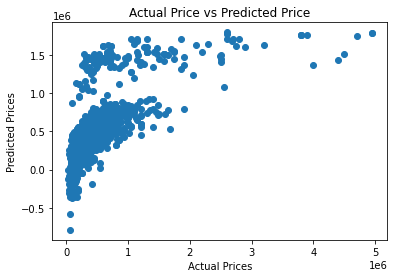

In [215]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [216]:
X_new= df.sample(1)

In [217]:
X_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
697,Maruti,Maruti Wagon R LXI Minor,2009,150000,53000,1,0,1,0


In [218]:
X_new.shape

(1, 9)

In [219]:
X_new=X_new.drop(['Selling_Price','Brand','Model'],axis=1)

In [220]:
X_new

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
697,2009,53000,1,0,1,0


In [221]:
X_new.shape

(1, 6)

In [222]:
y_pred_new= lr.predict(X_new)

In [223]:
y_pred_new

array([125601.80485147])